# DIABETES PREDICTION USING TENSORFLOW

* **In this project we are going to predict wether a female has diabetes**
* **The Diabetes dataset contains features of women who are diabetes positive or negative**
* **we are going to use tensorflow's sequential api model**

**importing necessary modules**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

**loading dataset**

In [135]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**summary**
* independant varaiables : pregnancies,glucose,bloodpressure,skin thickness,insuin,BMI,diabetes pedigree funtion and age 
* target variable is the outcome it has vals 0 and 1 
 

**data visuvalization to see correlation with the outcome**

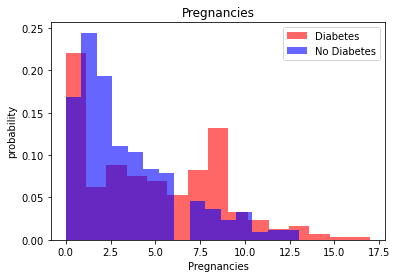

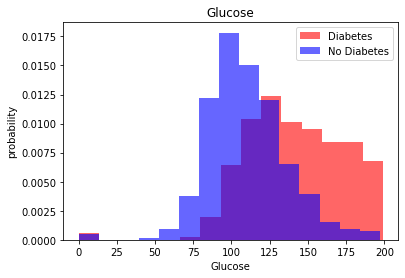

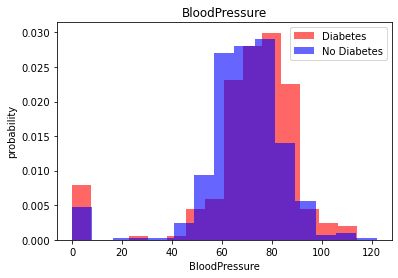

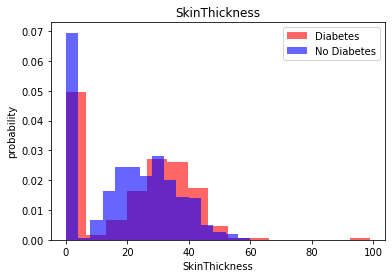

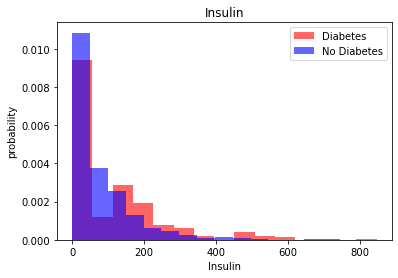

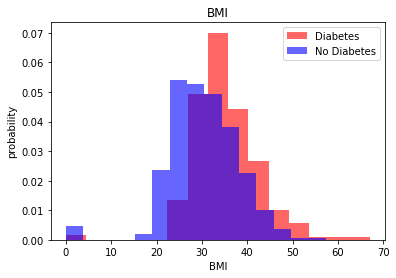

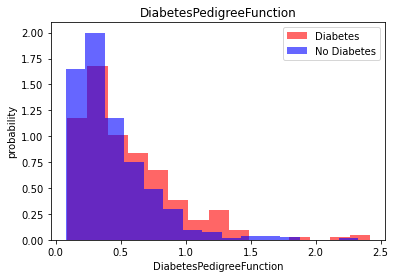

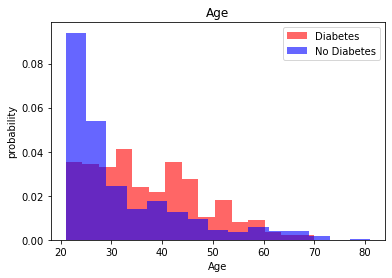

In [104]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color = 'red', label = 'Diabetes',alpha = 0.6 , density =True,bins = 15)
    plt.hist(df[df['Outcome']==0][label],color = 'blue', label = 'No Diabetes',alpha = 0.6 ,density =True,bins = 15)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

**summary :**
* maybe people with more pregancies have diabetes 
* people with more glucose level have been affected by diabetes
* people with diabetes have slightly higher bmi 
* with other features we can't come to a straight conclusion 

**creating our X and Y matrices**

In [136]:
X = df[df.columns[:-1]].values
Y = df['Outcome'].values
X,Y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

**Scaling Our X**
* scaling our data gives the data a normal distribution and also reduces the run time 

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y,(-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

**Random Oversampling**

In [138]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

* we can see that we have insufficient or un balanced data , to solve this problem we use random oversampling .

In [139]:
sampler = RandomOverSampler()
X,Y = sampler.fit_resample(X,Y)
data = np.hstack((X,np.reshape(Y,(-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

In [140]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

**Spliting our data to test and train data sets**

In [147]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,test_size = 0.4 , random_state = 0)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp,Y_temp,test_size = 0.5 , random_state = 0)
X_train.shape ,Y_train.shape ,X_dev.shape ,Y_dev.shape ,X_test.shape ,Y_test.shape

((600, 8), (600,), (200, 8), (200,), (200, 8), (200,))

* training sets : X_train , Y train
* validation sets : X_dev , Y_dev 
* test sets : X_test , Y_test

**Building our Model using Tensorflow**

In [151]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(20,activation = 'relu'),
                            tf.keras.layers.Dense(20,activation = 'relu'),
                            tf.keras.layers.Dense(20,activation = 'relu'),
                            tf.keras.layers.Dense(20,activation = 'relu'),
                            tf.keras.layers.Dense(16,activation = 'relu'),
                            tf.keras.layers.Dense(1,activation = 'sigmoid')
                            ])

In [152]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])

In [153]:
model.evaluate(X_train,Y_train)

19/19 [==============================] - 1s 4ms/step - loss: 0.6914 - accuracy: 0.5067


[0.6913692951202393, 0.5066666603088379]

In [154]:
model.evaluate(X_dev, Y_dev)

7/7 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4650


[0.6988235712051392, 0.4650000035762787]

**now lets fit our training data**

In [157]:
model.fit(X_train, Y_train, batch_size= 16, epochs = 20, validation_data = (X_dev,Y_dev))

Epoch 1/20
38/38 [==============================] - 0s 10ms/step - loss: 0.4062 - accuracy: 0.8233 - val_loss: 0.4253 - val_accuracy: 0.8050
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.8283 - val_loss: 0.4203 - val_accuracy: 0.8100
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.3871 - accuracy: 0.8283 - val_loss: 0.4241 - val_accuracy: 0.8050
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.3792 - accuracy: 0.8367 - val_loss: 0.4291 - val_accuracy: 0.8050
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.3759 - accuracy: 0.8300 - val_loss: 0.4222 - val_accuracy: 0.8050
Epoch 6/20
38/38 [==============================] - 0s 8ms/step - loss: 0.3655 - accuracy: 0.8433 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 0.3558 - accuracy: 0.8483 - val_loss: 0.4233 - val_accuracy: 0.8200
Epoch 8/20
38/38 [=

In [158]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.7900


[0.6342796087265015, 0.7900000214576721]

**considered the size of the data available an accuracy of 79percent on the test data is not bad** 